# Logistic Regression on Wine Quality

In [257]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [258]:
wine = pd.read_csv("winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploratory Data Analysis

In [259]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [260]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Remove outliers from wine data set using z-scores (z-scores of 3 or more are considered unusual).**

In [261]:
z_scores = stats.zscore(wine)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
filtered_wine = wine[filtered_entries]

filtered_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Logistic Regression

**Use logistic regression using all attributes as a basis (goal is to improve accuracy using only specific attributes). Random state should be constant for fair comparison.**

In [262]:
X_train, X_test, y_train, y_test = train_test_split(filtered_wine.iloc[:,0:11], filtered_wine['quality'], test_size=0.2, random_state = 1)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions))

Accuracy:  0.6116838487972509


**Goal is to improve on accuracy of 0.611684 by only selecting specific attributes.**

In [263]:
X_train, X_test, y_train, y_test = train_test_split(filtered_wine[['alcohol','residual sugar','free sulfur dioxide','pH','density','volatile acidity','total sulfur dioxide','sulphates','citric acid']], filtered_wine['quality'], test_size=0.2, random_state = 1)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions))

Accuracy:  0.6288659793814433


**Accuracy has been improved to 0.628866 by removing chlorides and fixed acidity.**

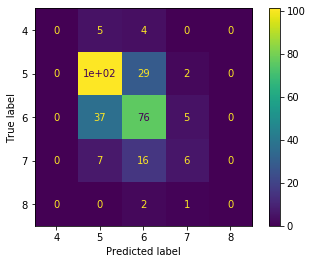

In [264]:
plot_confusion_matrix(logmodel,X_test,y_test)

**Based on the confusion matrix, the logistic regression model is very good at predicting 5 and 6. However, it indicates that the model is not as accurate when predcting 4, 7, and 8. The reason for this is because most of the data lies within the 5-6 quality range, making the model good at predicting a majority of the data, but not data outside of this range.**

## Binary Classification

**Transform data into a binary classification problem.**

In [265]:
def num2cat(value):
    if 3 <= value <= 5:
        return 'bad'
    else:
        return 'good'

filtered_wine['quality_cat'] = filtered_wine['quality'].apply(num2cat)

**Create column that splits wine quality between good (6 or more) and bad (5 or less) wine.**

In [266]:
filtered_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


**Perform logistic regression on the quality category using the previously selected attributes.**

In [267]:
X_train, X_test, y_train, y_test = train_test_split(filtered_wine[['alcohol','residual sugar','free sulfur dioxide','pH','density','volatile acidity','total sulfur dioxide','sulphates','citric acid']], filtered_wine['quality_cat'], test_size=0.2, random_state = 1)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

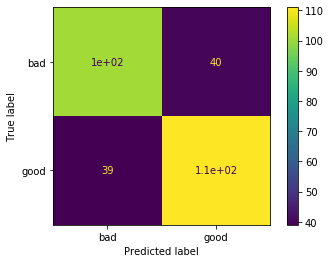

In [268]:
plot_confusion_matrix(logmodel,X_test,y_test)

**Based on the confusion matrix, this model is fairly accurate because it minimizes the number of false positives and false negatives while maximizing the number of true positives and true negatives.**

Confusion Matrix Values:
- True Positives (True label = good and Predicted Label = good): 100
- True Negatives (True label = bad and Predicted Label = bad): 110
- False Positives (True label = bad and Predicted Label = true): 40
- False Negatives (True label = good and Predicted Label = bad): 39

In [269]:
print("Accuracy: ", accuracy_score(y_test, predictions))

Accuracy:  0.7285223367697594


In [270]:
print("Recall: ", metrics.recall_score(y_test,predictions,average='weighted'))

Recall:  0.7285223367697594


In [271]:
print("Precision: ", metrics.precision_score(y_test,predictions,average='weighted'))

Precision:  0.728475358191341
